<a href="https://colab.research.google.com/github/vinayak1920/Project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
!unzip archive.zip

Archive:  archive.zip
replace austin_weather.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
data = pd.read_csv("austin_weather.csv")
data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,


In [ ]:
data = data.drop(
    ['Events', 'Date', 'SeaLevelPressureHighInches', 'SeaLevelPressureLowInches'], axis=1)
data = data.replace('T', 0.0)
data = data.replace('-', 0.0)
data.to_csv('austin_clean.csv')

In [ ]:
data = pd.read_csv("austin_clean.csv")

X = data.drop(['PrecipitationSumInches'], axis=1)

Y = data['PrecipitationSumInches']
Y = Y.values.reshape(-1, 1)
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(X, Y, test_size = 0.2)

day_index = 798
days = [i for i in range(Y.size)]

clf = LinearRegression()
clf.fit(x_train, y_train)

inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45],
                [57], [29.68], [10], [7], [2], [0], [20], [4], [31]])

inp = inp.reshape(1, -1)
clf.score(x_test, y_test)

0.24832672933066757

The precipitation in inches for the input is: [[1.33868402]]
The precipitation trend graph: 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Text(0, 0.5, 'Precipitation in inches')

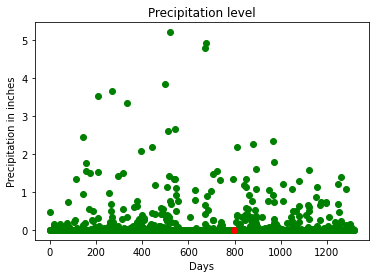

In [ ]:
print('The precipitation in inches for the input is:', clf.predict(inp))

print('The precipitation trend graph: ')
plt.scatter(days, Y, color='g')
plt.scatter(days[day_index], Y[day_index], color='r')
plt.title('Precipitation level')
plt.xlabel('Days')
plt.ylabel('Precipitation in inches')

Preciptiation Vs Selected Attributes Graph: 


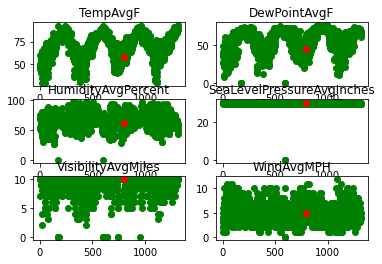

In [ ]:
x_f = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
                'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
                'WindAvgMPH'], axis=1)
print('Preciptiation Vs Selected Attributes Graph: ')
for i in range(x_f.columns.size):
    plt.subplot(3, 2, i+1)
    plt.scatter(days, x_f[x_f.columns.values[i][:100]], color='g')
    plt.scatter(days[day_index], x_f[x_f.columns.values[i]]
                [day_index], color='r')
    plt.title(x_f.columns.values[i])

plt.show()

# New Section

In [ ]:
dset = pd.read_csv("austin_clean.csv")
dset

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,0,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.68,10.0,7.0,2.0,20.0,4.0,31.0,0.46
1,1,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.13,10.0,10.0,5.0,16.0,6.0,25.0,0.00
2,2,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.49,10.0,10.0,10.0,8.0,3.0,12.0,0.00
3,3,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.45,10.0,10.0,7.0,12.0,4.0,20.0,0.00
4,4,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.33,10.0,10.0,7.0,10.0,2.0,16.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1314,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,29.97,10.0,10.0,10.0,12.0,5.0,21.0,0.00
1315,1315,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,29.90,10.0,10.0,10.0,14.0,5.0,20.0,0.00
1316,1316,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,29.86,10.0,10.0,10.0,12.0,4.0,17.0,0.00
1317,1317,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,29.91,10.0,10.0,10.0,13.0,4.0,20.0,0.00


In [ ]:
x = np.array(dset.drop(["PrecipitationSumInches"], 1))
y = np.array(dset["PrecipitationSumInches"])
print(x)
print(y)

[[0.000e+00 7.400e+01 6.000e+01 ... 2.000e+01 4.000e+00 3.100e+01]
 [1.000e+00 5.600e+01 4.800e+01 ... 1.600e+01 6.000e+00 2.500e+01]
 [2.000e+00 5.800e+01 4.500e+01 ... 8.000e+00 3.000e+00 1.200e+01]
 ...
 [1.316e+03 1.070e+02 9.200e+01 ... 1.200e+01 4.000e+00 1.700e+01]
 [1.317e+03 1.060e+02 9.300e+01 ... 1.300e+01 4.000e+00 2.000e+01]
 [1.318e+03 9.900e+01 8.800e+01 ... 1.200e+01 4.000e+00 2.000e+01]]
[0.46 0.   0.   ... 0.   0.   0.  ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size = 0.2)
rain_predict_linear = LinearRegression()
rain_predict_linear.fit(x_train, y_train)


LinearRegression()

In [ ]:
acc_linear = rain_predict_linear.score(x_test, y_test)
acc_linear

0.2920763845361726

# Polynomial Regression


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [ ]:
rain_predict_poly = LinearRegression()
rain_predict_poly.fit(x_train_poly, y_train)
acc_poly = rain_predict_poly.score(x_test_poly, y_test)

In [ ]:
acc_poly

-493.5306814526274

# SVM

In [ ]:
svmset = pd.read_csv("austin_weather.csv")
s = set(svmset["Events"])
s

{' ',
 'Fog',
 'Fog , Rain',
 'Fog , Rain , Thunderstorm',
 'Fog , Thunderstorm',
 'Rain',
 'Rain , Snow',
 'Rain , Thunderstorm',
 'Thunderstorm'}

In [ ]:
svmset

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,30.04,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,29.97,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,29.91,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,29.96,29.91,29.87,10,10,10,13,4,20,0,


In [ ]:
clfset =  svmset.drop(
    ['Date', 'SeaLevelPressureHighInches', 'SeaLevelPressureLowInches', "PrecipitationSumInches"], axis=1)
clfset = clfset.replace('-', 0.0)

x = np.array(clfset.drop(['Events'], 1))
y = np.array(clfset['Events'])

le = sk.preprocessing.LabelEncoder()
sl = le.fit_transform(list(s))
sl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


array([4, 1, 3, 8, 7, 5, 2, 0, 6])

In [ ]:
y = le.fit_transform(list(y))

In [ ]:
set_ = set()

In [ ]:
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size = 0.2)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)
acc_knn = knn.score(x_test, y_test)
acc_knn

0.7537878787878788

# SVM

In [ ]:
from sklearn import svm

svm_weather = svm.SVC(kernel='linear', C=2)
svm_weather.fit(x_train, y_train)
acc_svm = svm_weather.score(x_test, y_test)
acc_svm

0.7992424242424242

# QSVM Simple